In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import os
import glob

from scipy import stats
#import openpyxl
from scipy import stats
import scipy.stats as sps
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


fp = "C:/Users/CrockettWalt_3fe58a3/OneDrive - Pivot Bio/Documents/2025_PTV_Projects/temp_results/Onfarm/analysis_data_v2-sep19"
combined_output = r'C:/Users/CrockettWalt_3fe58a3/OneDrive - Pivot Bio/Documents/2025_PTV_Projects/temp_results/Onfarm/combo/tempresults_onfarm.csv'

file = r'C:/Users/CrockettWalt_3fe58a3/OneDrive - Pivot Bio/Documents/2025_PTV_Projects/temp_results/Biomass data/Daufeldt 550 Biomass.csv'
df3 = pd.read_csv(file)

file = r'C:/Users/CrockettWalt_3fe58a3/OneDrive - Pivot Bio/Documents/2025_PTV_Projects/temp_results/Onfarm/QC_values/Pulling_LiDAR_QC_Scores.csv'
df3 = pd.read_csv(file)

# Set the root directory to start from
root_dir = fp

# List to store individual DataFrames
all_dfs = []

# Walk through all subdirectories
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_path = os.path.join(root, file)
            df = pd.read_csv(csv_path)
            all_dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(all_dfs, ignore_index=True)

df2 = combined_df.copy()

### 
### Use above code if importing multiple sites with no QC or adding QC later. Use below import and code if importing traits with QCs from one sheet.
#### Eventually, change export to be at end of trait creation
###

In [60]:

df2['plot'] = df2['plot'].astype('int')
df2['rep'] = df2['plot'].astype(str)
df2['rep'] = df2['rep'].str[: -2]
df2['rep'] = df2['rep'].astype('int')

df2 = df2.rename(columns = {"CHM_90%":"CHM_90"})
df2 = df2.rename(columns = {"CHM_98%":"CHM_98"})
df2 = df2.rename(columns = {"CHM_mean":"CHM_mean"})
df2 = df2.rename(columns = {"CHM_std":"CHM_std"})
df2['lowerMid_inv_pc'] = df2['lowerMid_pc'] * -1
df2['lowerMid_inv_vol'] = df2['lowerMid_vol'] * -1

# Show all trials included in analysis 
trials = df2['trial_id'].unique()
unique_df = pd.DataFrame(trials, columns=['trial_id'])
print(unique_df)

df3 = df3.rename(columns = {"swath":"swath_index"})

data = df2.copy()
data = pd.merge(df2, df3, on=['trial_id', 'plot', 'swath_index'], how='outer')
df3 = data.copy()
df3['LiDAR_Biomass'] = ((df3['Top_50cm_vol']-df3['lowerMid_pc'])/(df3['Top_50cm_vol']+df3['lowerMid_pc']))+(df3['Top_50cm_vol']/1500)+(df3['CHM_mean']/2)
df3['LiDAR_Biomass_inv'] = df3['LiDAR_Biomass']*-1


#df3['site_abv'] = ["IA02" if x == "25-ZEAMX-US550-IA02-DAUF"
 #   else "IA03" if x == "25-ZEAMX-US550-IA03-DAUF"
 #   else "IA04" if x == "25-ZEAMX-US550-IA04-DAUF"
 #   else '' for x in df3['trial_id']]

                    trial_id
0   25-ZEAMX-US550-IA02-DAUF
1   25-ZEAMX-US550-IA03-DAUF
2   25-ZEAMX-US550-IA04-DAUF
3   25-ZEAMX-US550-IL03-DEGR
4   25-ZEAMX-US550-MN01-GETT
5   25-ZEAMX-US550-MO02-SNEL
6   25-ZEAMX-US550-NC01-LAMB
7   25-ZEAMX-US550-NE01-WEST
8   25-ZEAMX-US551-IL02-DEGR
9   25-ZEAMX-US551-KS01-WEST
10  25-ZEAMX-US551-MN01-GETT
11  25-ZEAMX-US551-MN02-GETT
12  25-ZEAMX-US551-MS01-PRIN
13  25-ZEAMX-US551-NE02-WEST
14  25-ZEAMX-US551-TN01-PRIN
15  25-ZEAMX-US560-MO01-SNEL
16  25-ZEAMX-US561-IA01-DAUF
17  25-ZEAMX-US561-IA02-DAUF
18  25-ZEAMX-US570-IA01-DAUF
19  25-ZEAMX-US570-IL05-WOOD


In [61]:
#Average CHM98 across all plots in a given trial. Adjust height of plot as percent of trial height

df = df3.copy()
df = df.loc[:, ['trial_id', 'CHM_98']]

gb = df.groupby(['trial_id'])
agg_dict = {x: ('first' if df[x].dtype=='O' else 'median') for x in df.columns}
df = gb.agg(agg_dict)

df = df.drop('trial_id', axis=1)
df = df.reset_index()
df = df.rename(columns = {"CHM_98":"CHM_98_trialadj"})

CHM_avg = df.copy()    


df_adj = pd.merge(df3, CHM_avg, on =['trial_id'], how = 'outer')
df_adj['CHM_98_diff'] = df_adj['CHM_98'] - df_adj['CHM_98_trialadj']


data = df_adj.copy()

# Optionally, save to a new CSV
data.to_csv(combined_output, index=False)

In [62]:
CHM_avg

,trial_id,CHM_98_trialadj
0,25-ZEAMX-US550-IA02-DAUF,0.63800
1,25-ZEAMX-US550-IA03-DAUF,1.48000
2,25-ZEAMX-US550-IA04-DAUF,0.98650
3,25-ZEAMX-US550-IL01-DEGR,NaN
4,25-ZEAMX-US550-IL03-DEGR,1.67392
5,25-ZEAMX-US550-MN01-GETT,2.29350
6,25-ZEAMX-US550-MO02-SNEL,2.28500
7,25-ZEAMX-US550-NC01-LAMB,0.98000
8,25-ZEAMX-US550-NE01-WEST,2.38500
9,25-ZEAMX-US551-IL02-DEGR,1.91200


In [63]:
data['site_abv'] = ["0-IA02" if x == "25-ZEAMX-US550-IA02-DAUF"
    else "0-IA03" if x == "25-ZEAMX-US550-IA03-DAUF"
    else "0-IA04" if x == "25-ZEAMX-US550-IA04-DAUF"
    else "0-IL01" if x == "25-ZEAMX-US550-IL01-DEGR"
    else "0-IL03" if x == "25-ZEAMX-US550-IL03-DEGR"
    else "0-MN01" if x == "25-ZEAMX-US550-MN01-GETT"
    else "0-MO02" if x == "25-ZEAMX-US550-MO02-SNEL"
    else "0-NC01" if x == "25-ZEAMX-US550-NC01-LAMB"
    else "0-NE01" if x == "25-ZEAMX-US550-NE01-WEST"
    else "1-IL02" if x == "25-ZEAMX-US551-IL02-DEGR"
    else "1-KS01" if x == "25-ZEAMX-US551-KS01-WEST"
    else "1-MN01" if x == "25-ZEAMX-US551-MN01-GETT"
    else "1-MN02" if x == "25-ZEAMX-US551-MN02-GETT"
    else "1-MS01" if x == "25-ZEAMX-US551-MS01-PRIN"
    else "1-NE02" if x == "25-ZEAMX-US551-NE02-WEST"
    else "1-TN01" if x == "25-ZEAMX-US551-TN01-PRIN"
    else "0-MO01" if x == "25-ZEAMX-US560-MO01-SNEL"
    else "1-IA01" if x == "25-ZEAMX-US561-IA01-DAUF"
    else "1-IA02" if x == "25-ZEAMX-US561-IA02-DAUF"
    else "0-IA01-0" if x == "25-ZEAMX-US570-IA01-DAUF"
    else "0-IL05" if x == "25-ZEAMX-US570-IL05-WOOD"
    else '' for x in data['trial_id']]

In [64]:
data = data.copy()


df_filtered = data[data["treatment"].between(1, 6)]
df = df_filtered.copy()


data1 = df.loc[(df['qc'] == 1)]
data2 = df.loc[(df['qc'] != 3)]

combined_output2 = r'C:/Users/CrockettWalt_3fe58a3/OneDrive - Pivot Bio/Documents/2025_PTV_Projects/temp_results/Onfarm/combo/tempresults_onfarm_QC.csv'

data2.to_csv(combined_output2, index=False)

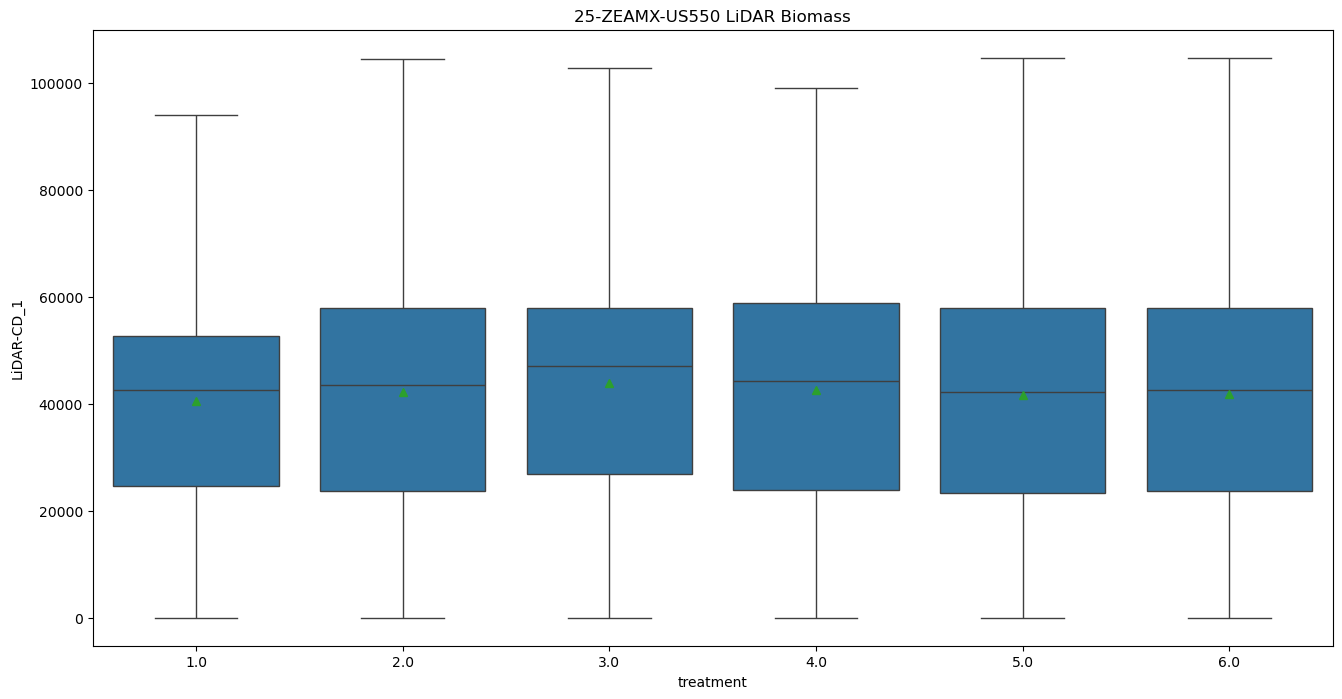

In [65]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data2, x = 'treatment', y = 'Top_50cm_pc', showmeans=True).set(title="25-ZEAMX-US550 LiDAR Biomass", ylabel='LiDAR-CD_1')

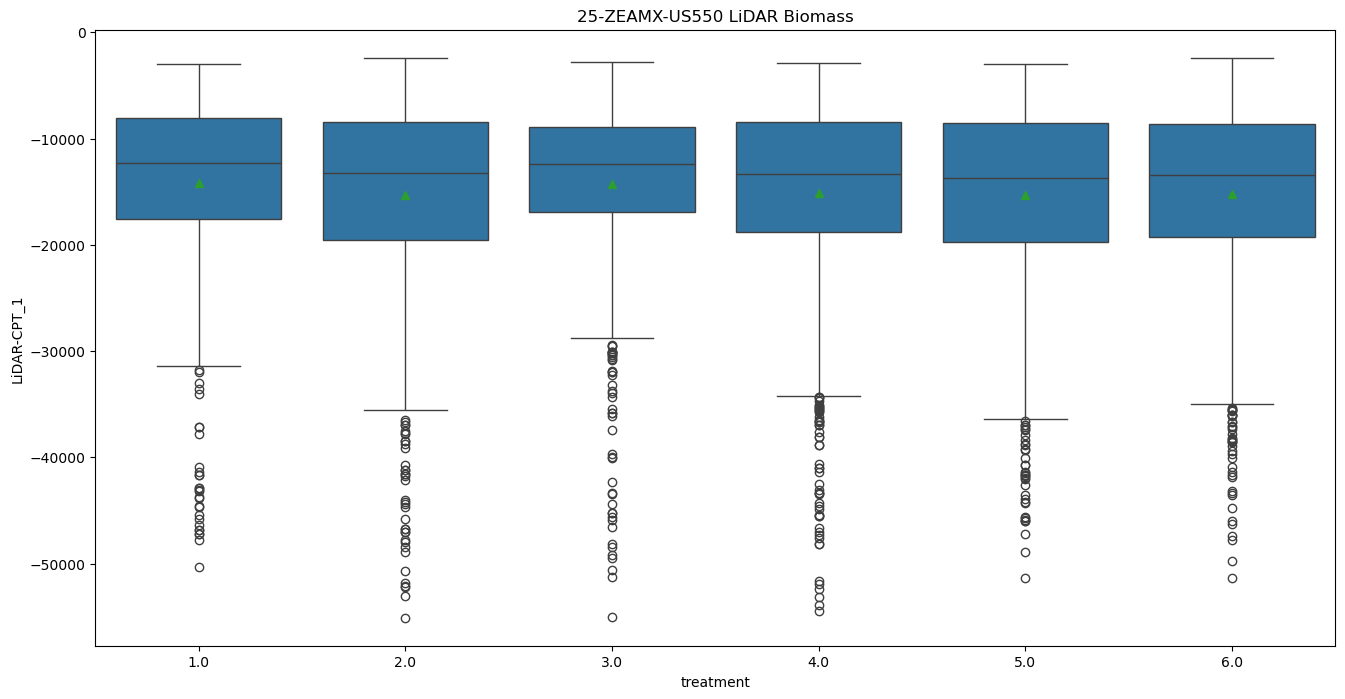

In [66]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data2, x = 'treatment', y = 'lowerMid_inv_pc', showmeans=True).set(title="25-ZEAMX-US550 LiDAR Biomass", ylabel='LiDAR-CPT_1')

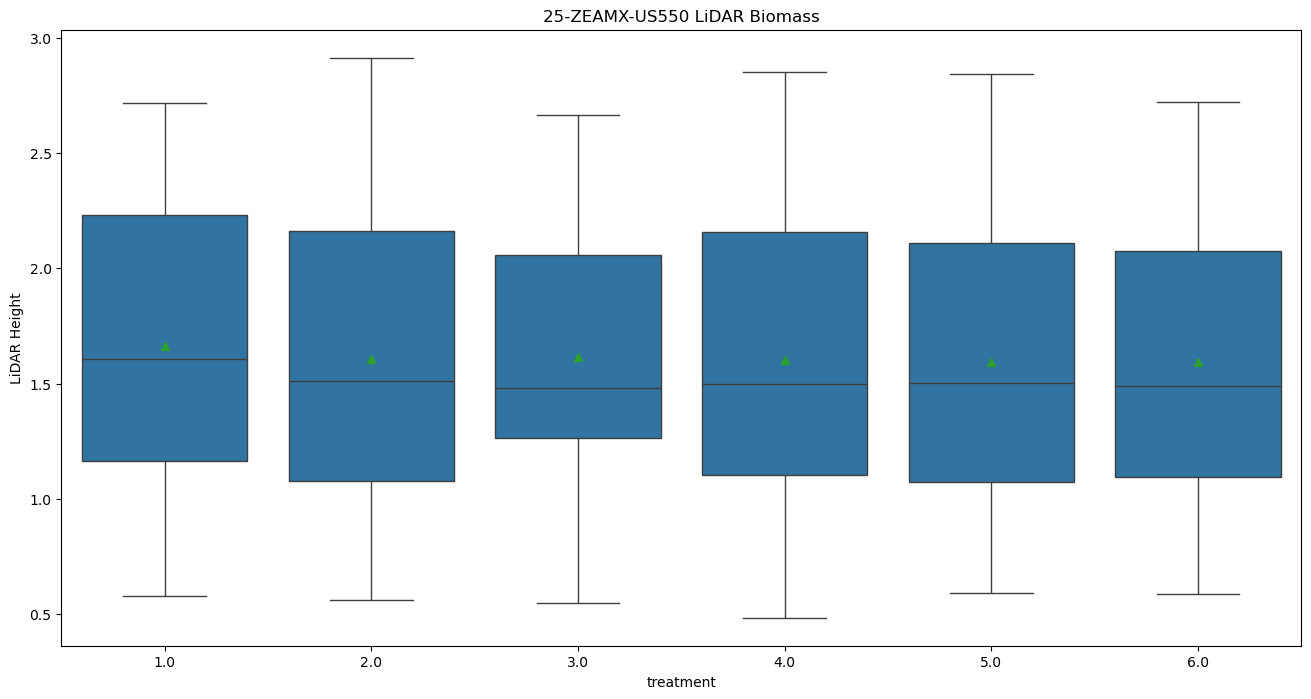

In [67]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data2, x = 'treatment', y = 'CHM_98', showmeans=True).set(title="25-ZEAMX-US550 LiDAR Biomass", ylabel='LiDAR Height')

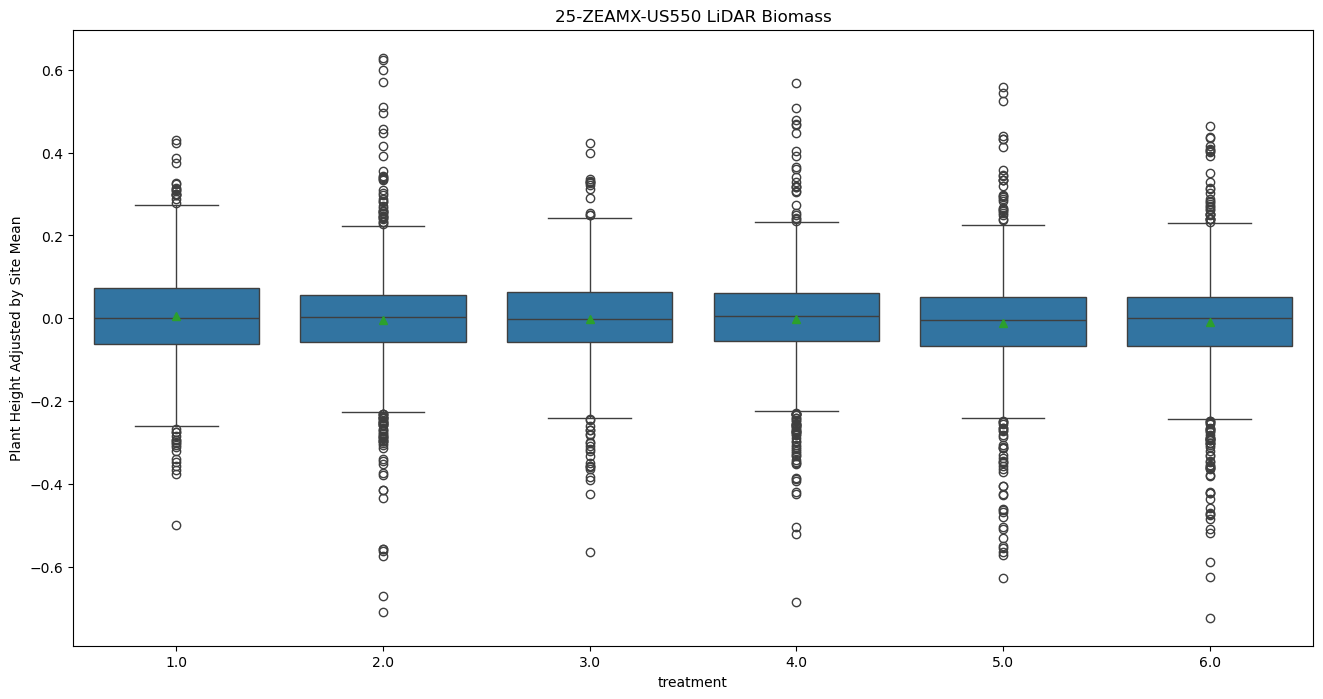

In [68]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data2, x = 'treatment', y = 'CHM_98_diff', showmeans=True).set(title="25-ZEAMX-US550 LiDAR Biomass", ylabel='Plant Height Adjusted by Site Mean')

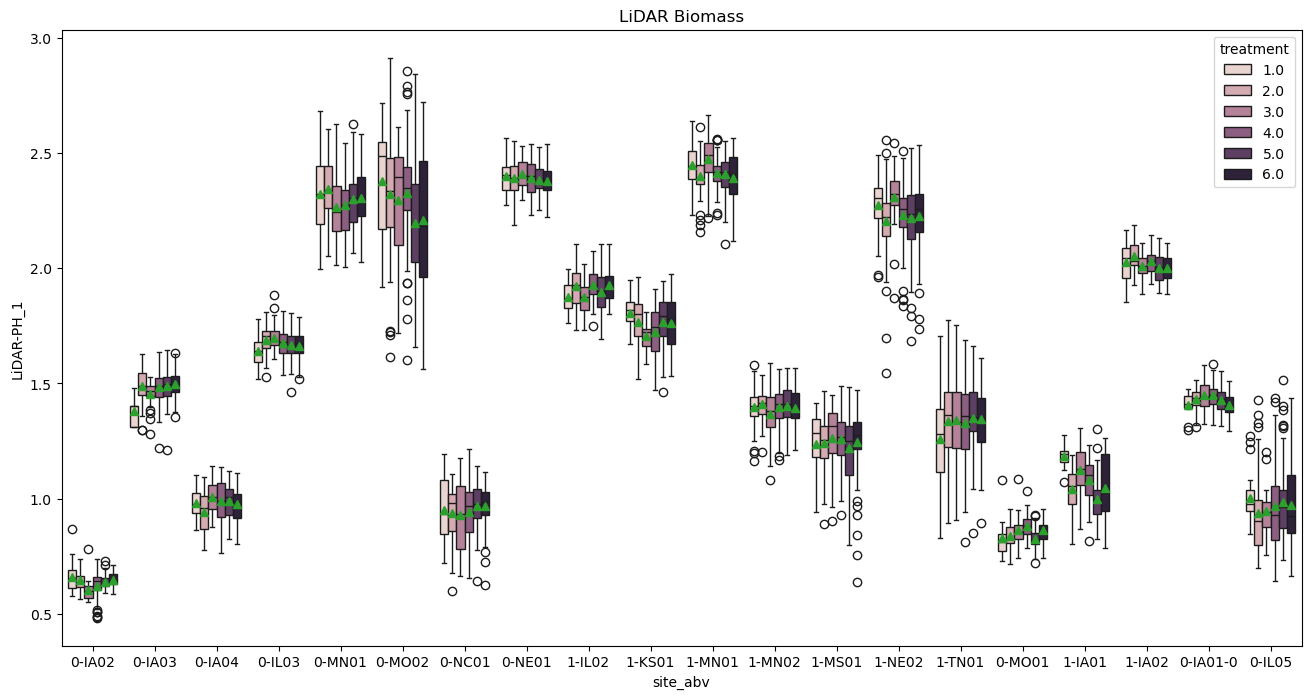

In [69]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data2, x = 'site_abv', y = 'CHM_98', hue='treatment', showmeans=True).set(title="LiDAR Biomass", ylabel='LiDAR-PH_1')

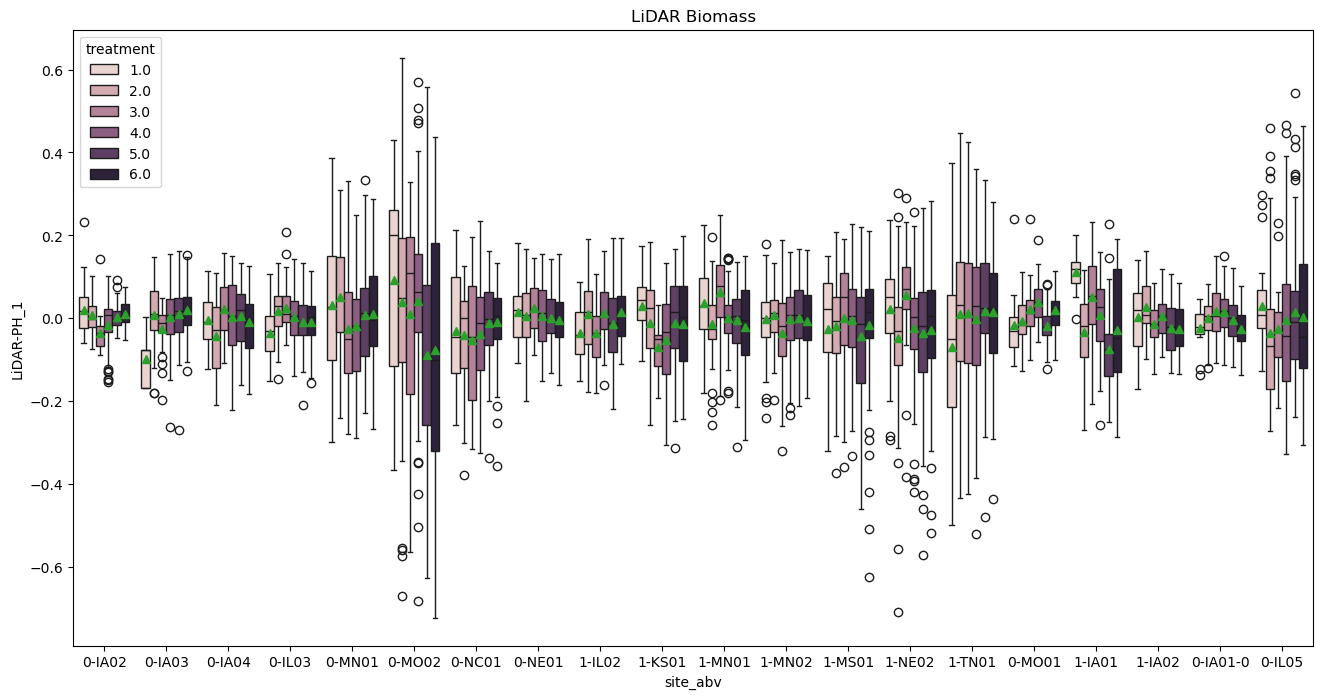

In [70]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data2, x = 'site_abv', y = 'CHM_98_diff', hue='treatment', showmeans=True).set(title="LiDAR Biomass", ylabel='LiDAR-PH_1')

### QC applied 


In [134]:

data_qc1 = df_adj.loc[(df_adj['lidar_qc'] == 1)]
data_qc = data_qc1.loc[(data_qc1['trial_id'] != '25-ZEAMX-US550-IA03-DAUF')]
data_qc_IA04 = data_qc.loc[(data_qc['trial_id'] == '25-ZEAMX-US550-IA04-DAUF')]

data_raw = df_adj.copy()
data = data_qc.copy()

In [139]:

combined_output2 = r'C:/Users/CrockettWalt_3fe58a3/OneDrive - Pivot Bio/Documents/2025_PTV_Projects/temp_results/Onfarm/combo/tempresults_onfarm_QC.csv'

data_qc.to_csv(combined_output2, index=False)

<Figure size 800x800 with 0 Axes>

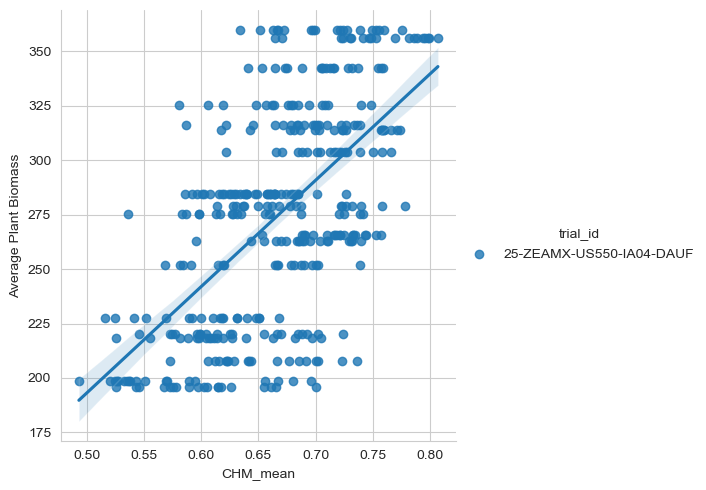

<Figure size 800x800 with 0 Axes>

In [140]:
ax = sns.lmplot( data=data_qc_IA04, x="CHM_mean", y="Average Plant Biomass", hue='trial_id')#, hue='trial_id')
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

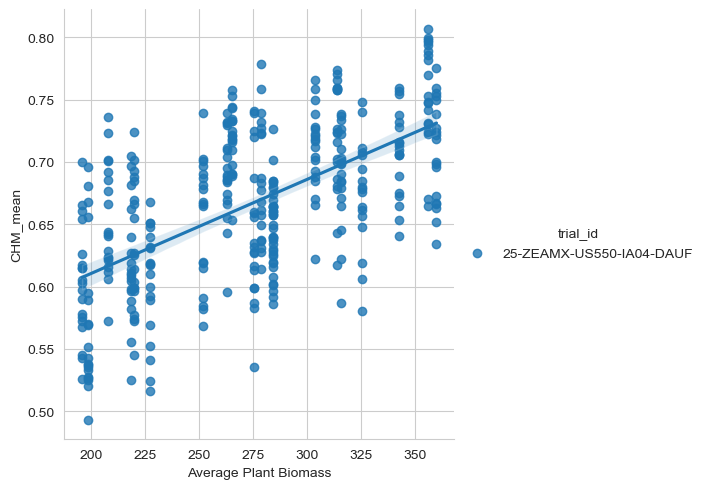

<Figure size 800x800 with 0 Axes>

In [141]:
ax = sns.lmplot( data=data_qc_IA04, x="Average Plant Biomass", y="CHM_mean", hue='trial_id')#, hue='trial_id')
plt.figure(figsize=(8,8))

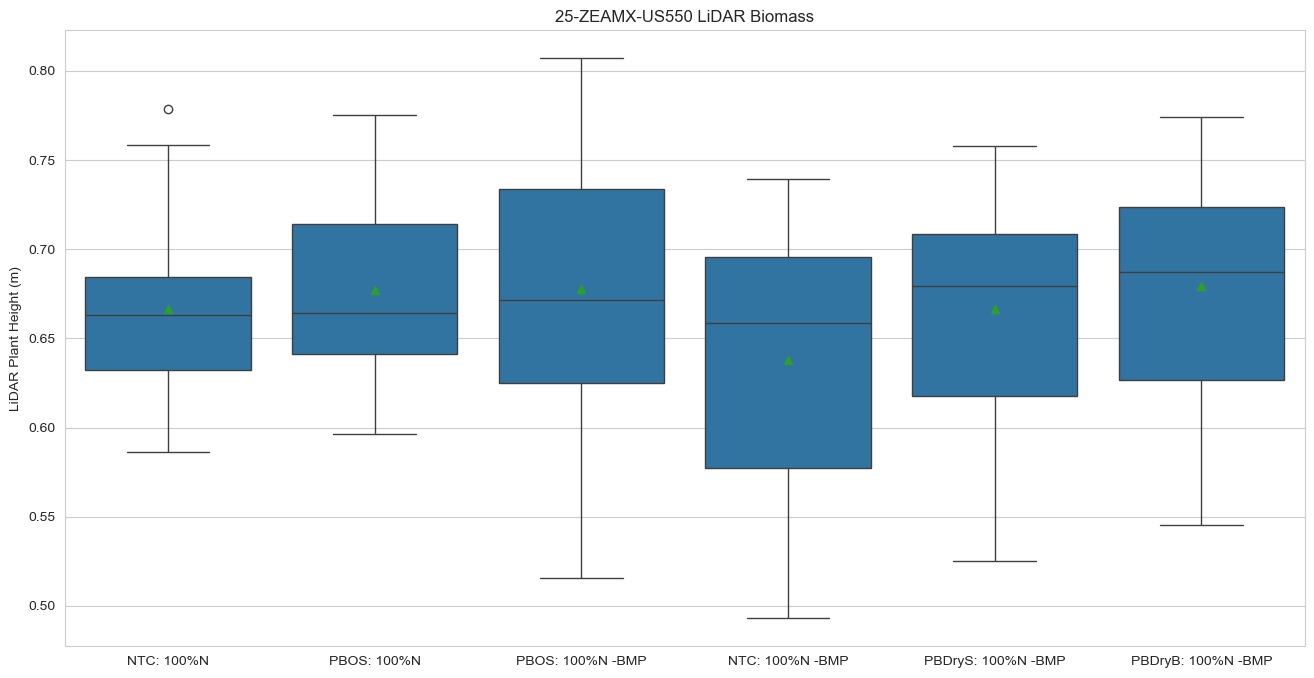

In [150]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data_qc_IA04, x = 'Treatment Description', y = 'CHM_mean', showmeans=True).set(title="25-ZEAMX-US550 LiDAR Biomass", ylabel='LiDAR Plant Height (m)', xlabel='')

C:\Users\CrockettWalt_3fe58a3\AppData\Local\Temp\ipykernel_25796\2651565302.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)
C:\Users\CrockettWalt_3fe58a3\AppData\Local\Temp\ipykernel_25796\2651565302.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=20)  #new_labels,


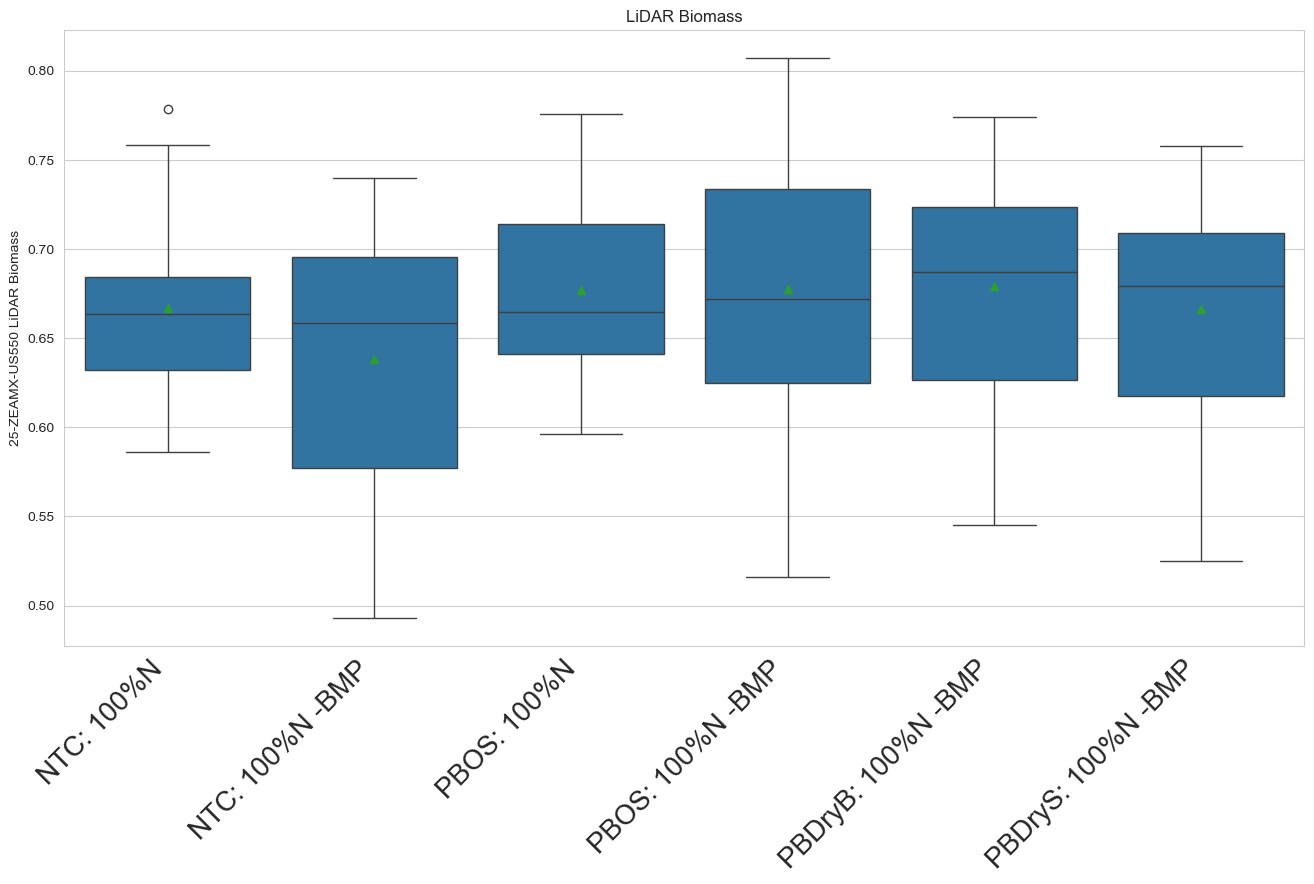

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt


#ax = sns.boxplot(data=data_qc_IA04, x = 'Treatment Description', y = 'CHM_mean', showmeans=True).set(title="25-ZEAMX-US550 LiDAR Biomass", ylabel='LiDAR Plant Height (m)', xlabel='')


fig, ax = plt.subplots(figsize=(16, 8))
desired_order = ['NTC: 100%N', 'NTC: 100%N -BMP', 'PBOS: 100%N', 'PBOS: 100%N -BMP', 'PBDryB: 100%N -BMP', 'PBDryS: 100%N -BMP']

# Create the boxplot and keep ax as the Axes object
sns.boxplot(data=data_qc_IA04, x = 'Treatment Description', y = 'CHM_mean', order=desired_order, showmeans=True, ax=ax)

# Set title and y-label
ax.set(title="LiDAR Biomass", ylabel="25-ZEAMX-US550 LiDAR Biomass", xlabel='')

# Add red line at y=0
#ax.axhline(0, color='red', linestyle='--', linewidth=2)

new_labels = ['NTC: 100%N', 'NTC: 100%N -BMP', 'PBOS: 100%N', 'PBOS: 100%N -BMP', 'PBDryB: 100%N -BMP', 'PBDryS: 100%N -BMP']
ax.set_xticklabels(new_labels)

ax.set_xticklabels(new_labels, rotation=45, ha='right', fontsize=20)  #new_labels,



plt.show()

In [143]:
from sklearn.metrics import mean_squared_error
import numpy as np


selected_columns = ['Average Plant Biomass', 'Top_50cm_pc', 'lowerMid_inv_pc', 'CHM_98', 'CHM_mean', 'LiDAR_Biomass','CHM_98_diff']  # Replace with your desired column names
df_1 = data_qc_IA04[selected_columns]


data = df_1.copy()
#metrics = data[data.columns[10:]]
metrics = data.copy()
data = data.fillna(0)
#metrics = metrics.fillna(0)
#metrics

variables = metrics.columns
harvest = data
#makes a dictionary
empdict = {}

#the column in the empdict provides the 
# create a table name 'variables'
for column in variables:
    empdict[column] = sps.linregress(harvest[column], harvest['Average Plant Biomass'])    
df = pd.DataFrame.from_dict(empdict, orient = 'index')
df['r_squared'] = df['rvalue'] * df['rvalue']
df = df.sort_values('r_squared', ascending=False)
df

df.dropna(axis=0, how='any',  subset=None, inplace=True)  #thresh=None,
df

################################################################################
rms_lidar = []
df.index

for col in df.index:
    rms = mean_squared_error(harvest['Average Plant Biomass'], (harvest[col] * df.loc[col,'slope'] 
                                                   + df.loc[col,'intercept']))
    rms_lidar.append(rms)
rms_lidar

df1 = pd.DataFrame(rms_lidar, columns=['RMSE'])
df1['metric'] = df.index
df['metric'] = df.index
df = df.set_index('metric')
df = df.reset_index()

df = df.merge(df1,on='metric')
df['RMSE'] = df['RMSE']
#df.head(50)
LNresults = df.copy()
LNresults.head(50)

,metric,slope,intercept,rvalue,pvalue,stderr,r_squared,RMSE
0,Average Plant Biomass,1.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000
1,CHM_mean,488.075115,-50.895073,0.607184,3.002870e-39,33.026125,0.368673,1610.461229
2,LiDAR_Biomass,908.885039,872.367041,0.606993,3.217688e-39,61.531376,0.368440,1611.053713
3,CHM_98,432.565793,-157.699636,0.589704,1.373457e-36,30.632990,0.347750,1663.832119
4,CHM_98_diff,432.565793,278.326690,0.589704,1.373457e-36,30.632990,0.347750,1663.832119
5,lowerMid_inv_pc,0.006321,374.173269,0.579174,4.610332e-35,0.000460,0.335443,1695.228639
6,Top_50cm_pc,0.002989,131.900091,0.575860,1.357328e-34,0.000219,0.331614,1704.994285


In [144]:
data = data_qc.copy()

<Figure size 800x800 with 0 Axes>

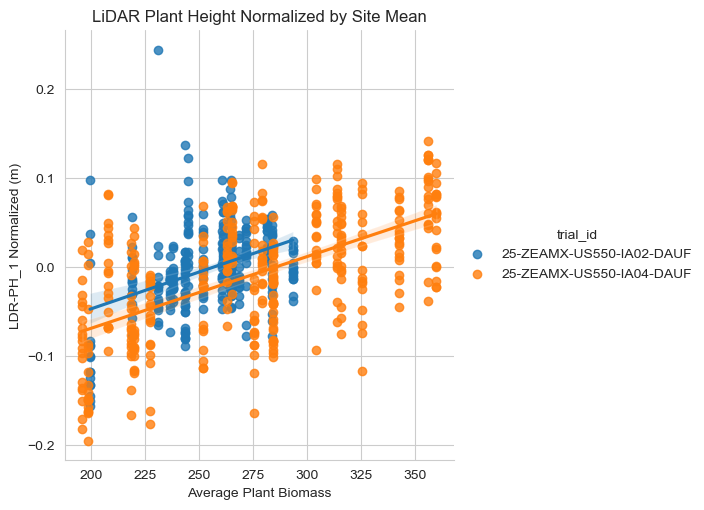

<Figure size 800x800 with 0 Axes>

In [156]:
ax = sns.lmplot( data=data, x="Average Plant Biomass", y="CHM_98_diff", hue='trial_id').set(title="LiDAR Plant Height Normalized by Site Mean", ylabel='LDR-PH_1 Normalized (m)')
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

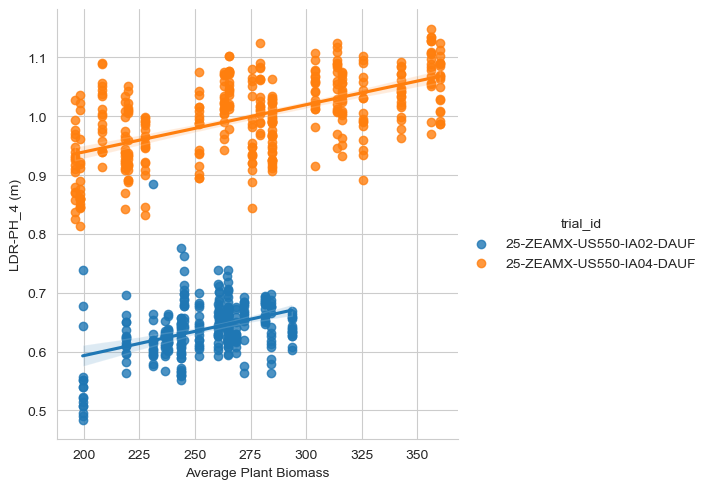

<Figure size 800x800 with 0 Axes>

In [118]:
ax = sns.lmplot( data=data, x="Average Plant Biomass", y="CHM_98", hue='trial_id').set(title="", ylabel='LDR-PH_4 (m)')
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

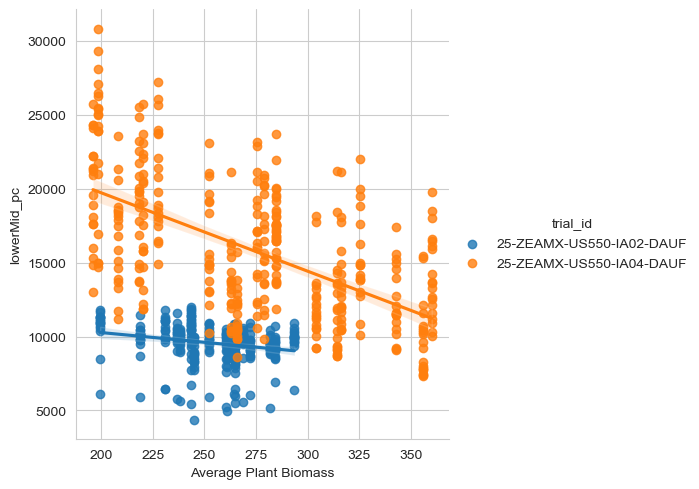

<Figure size 800x800 with 0 Axes>

In [124]:
ax = sns.lmplot( data=data, x="Average Plant Biomass", y="lowerMid_pc", hue='trial_id').set(title="")
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

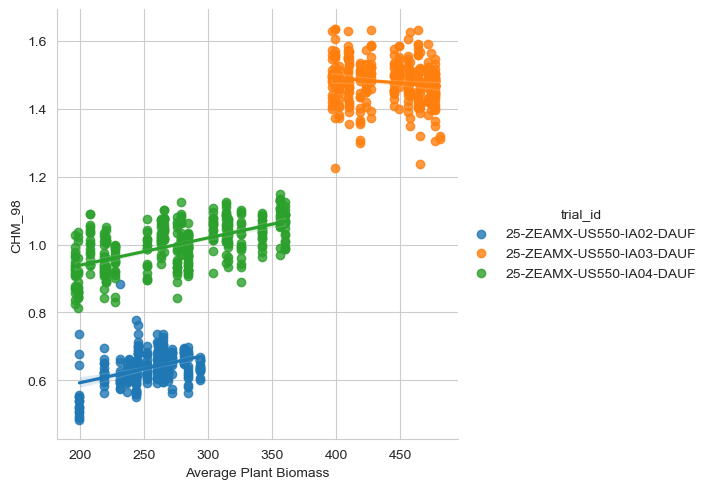

<Figure size 800x800 with 0 Axes>

In [99]:
ax = sns.lmplot( data=data, x="Average Plant Biomass", y="CHM_98", hue='trial_id')#, hue='trial_id')
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

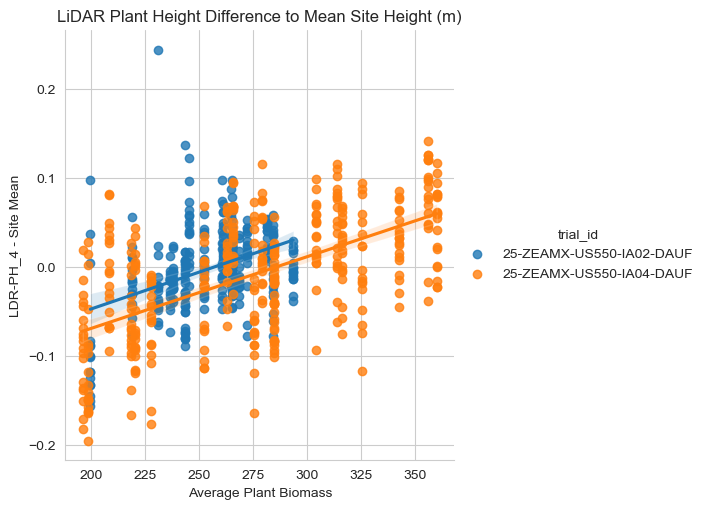

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

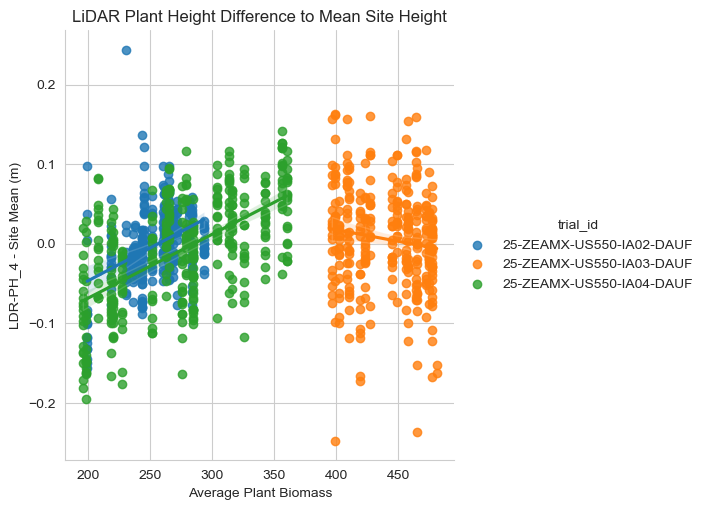

<Figure size 800x800 with 0 Axes>

In [97]:
ax = sns.lmplot( data=data, x="Average Plant Biomass", y="CHM_98_diff", hue='trial_id').set(title="LiDAR Plant Height Difference to Mean Site Height", ylabel='LDR-PH_4 - Site Mean (m)')
plt.figure(figsize=(8,8))

In [89]:
#sns.scatterplot(data=data, x="Average Plant Biomass", y="CHM_98", hue='site_abv').set(title="")#, xlabel=''


[Text(0.5, 1.0, '')]

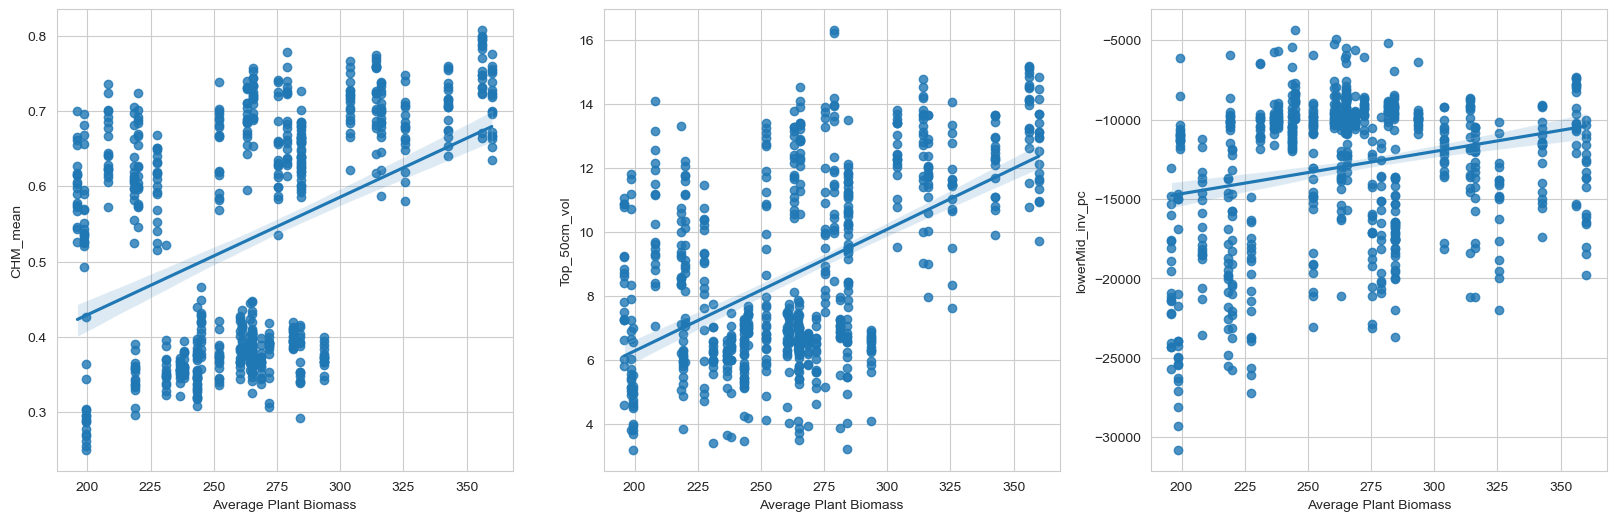

In [92]:
f, ax = plt.subplots(1, 3, figsize=(20,6))  #creates two plots side by side
sns.set_style("whitegrid")
sns.regplot( data=data, x="Average Plant Biomass", y="CHM_mean", ax=ax[0]).set(title="")#, xlabel='', ylabel="")
sns.regplot( data=data, x="Average Plant Biomass", y="Top_50cm_vol", ax=ax[1]).set(title="")#, xlabel='', ylabel="")
sns.regplot( data=data, x="Average Plant Biomass", y="lowerMid_inv_pc", ax=ax[2]).set(title="")#, xlabel='', ylabel="")

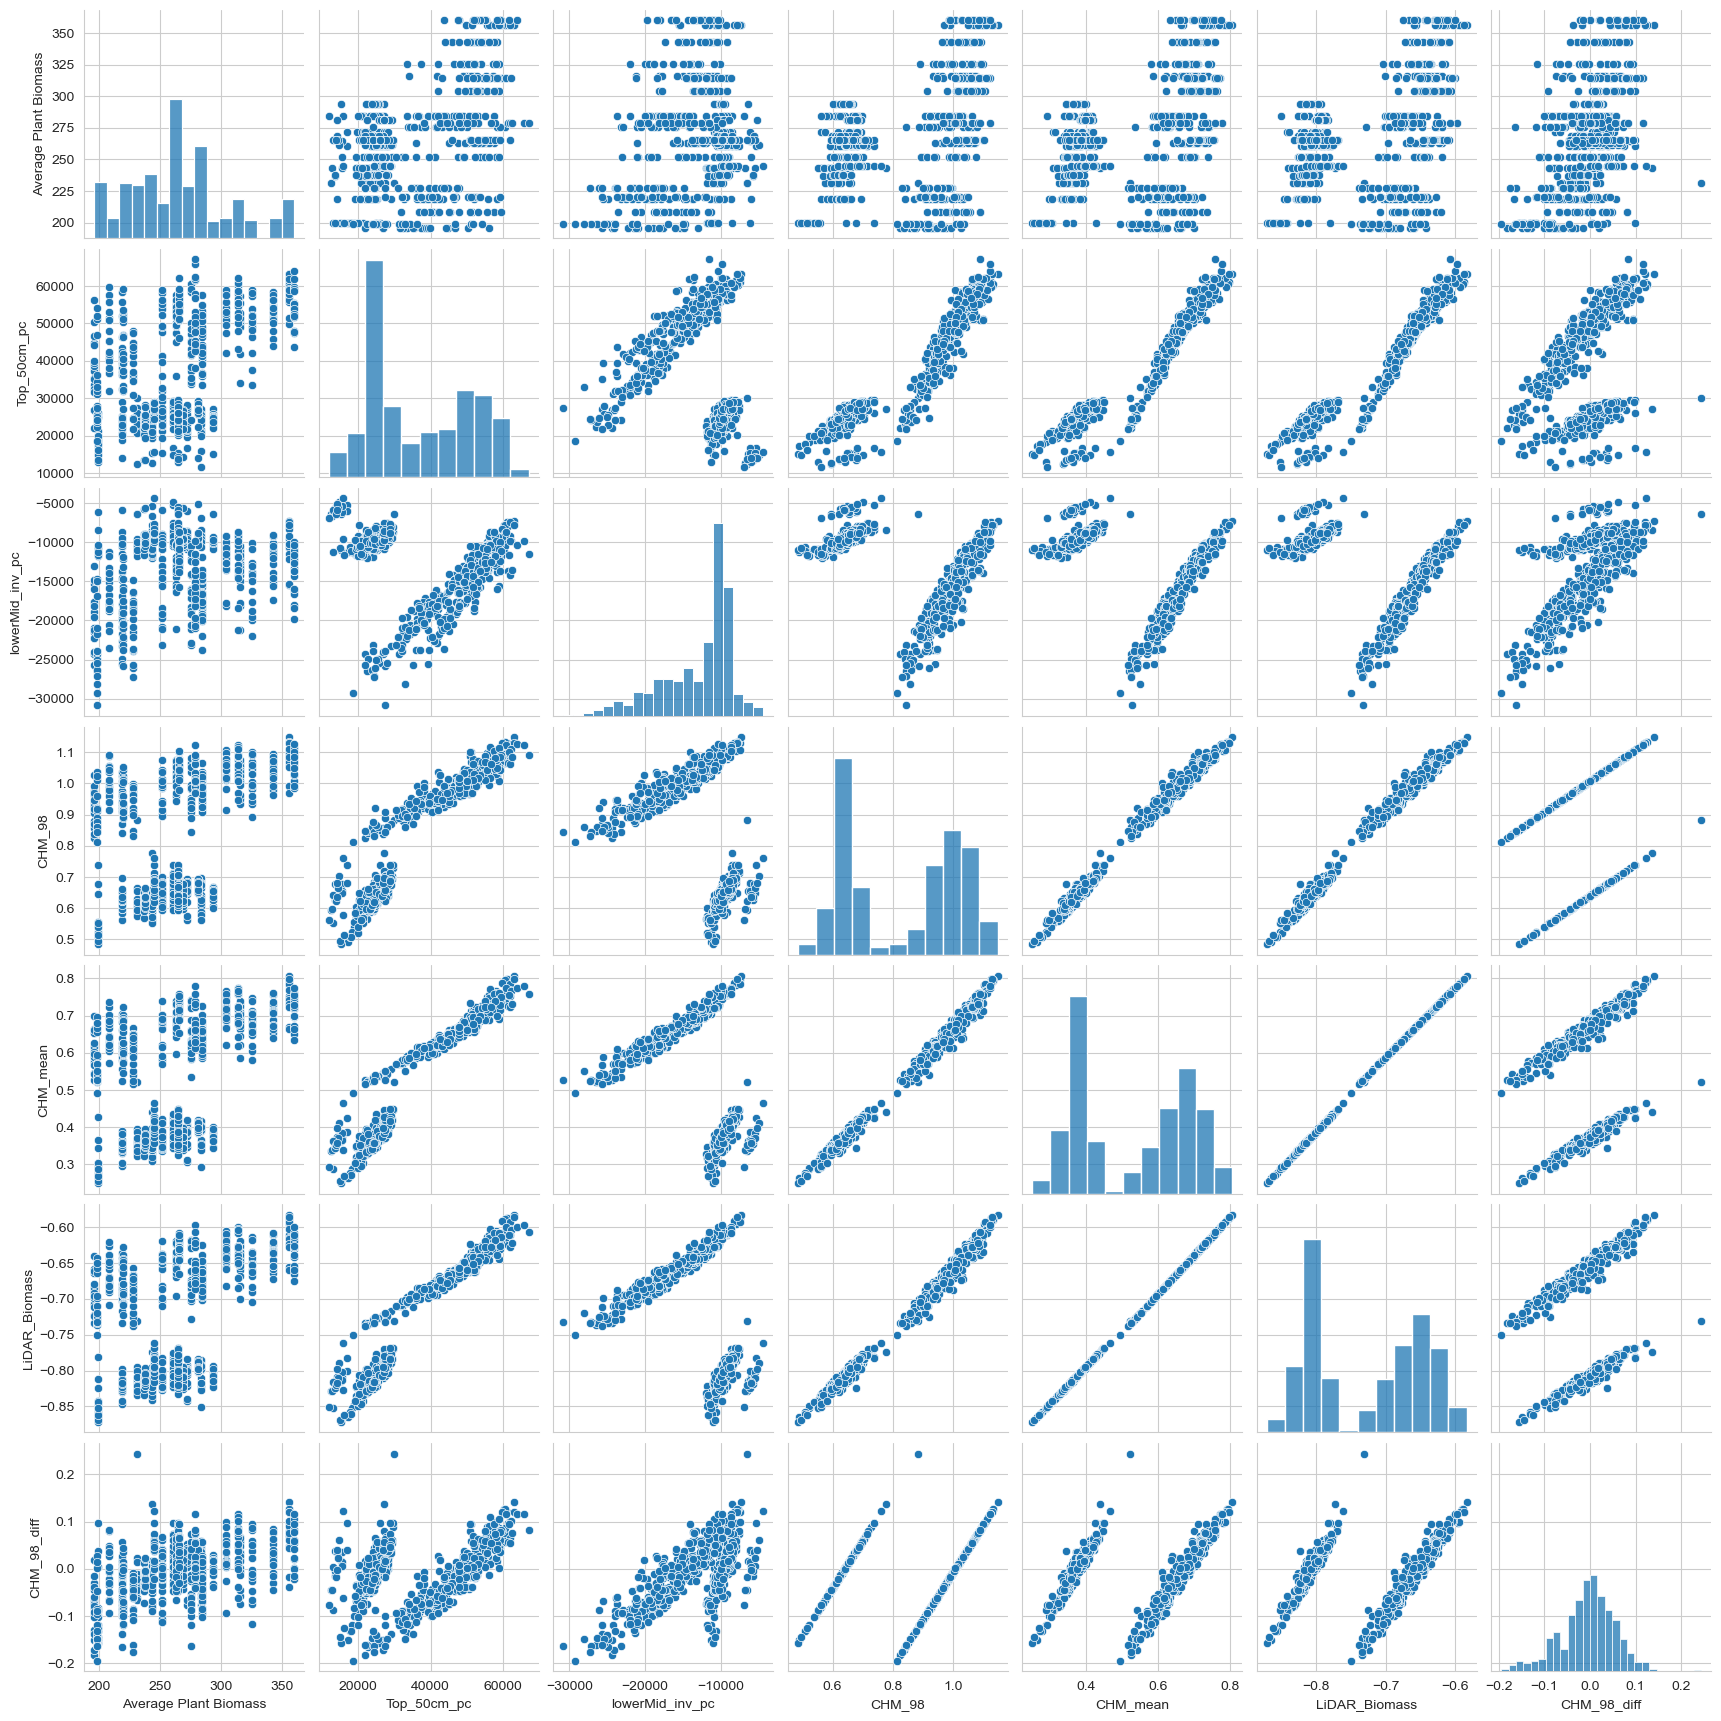

In [77]:
selected_columns = ['Average Plant Biomass', 'Top_50cm_pc', 'lowerMid_inv_pc', 'CHM_98', 'CHM_mean', 'LiDAR_Biomass','CHM_98_diff']  # Replace with your desired column names
df_1 = data[selected_columns]

selected_columns = ['Average Plant Biomass', 'CHM_98', 'lowerMid_inv_pc']  # Replace with your desired column names
df_3 = data[selected_columns]

sns.pairplot(df_1)


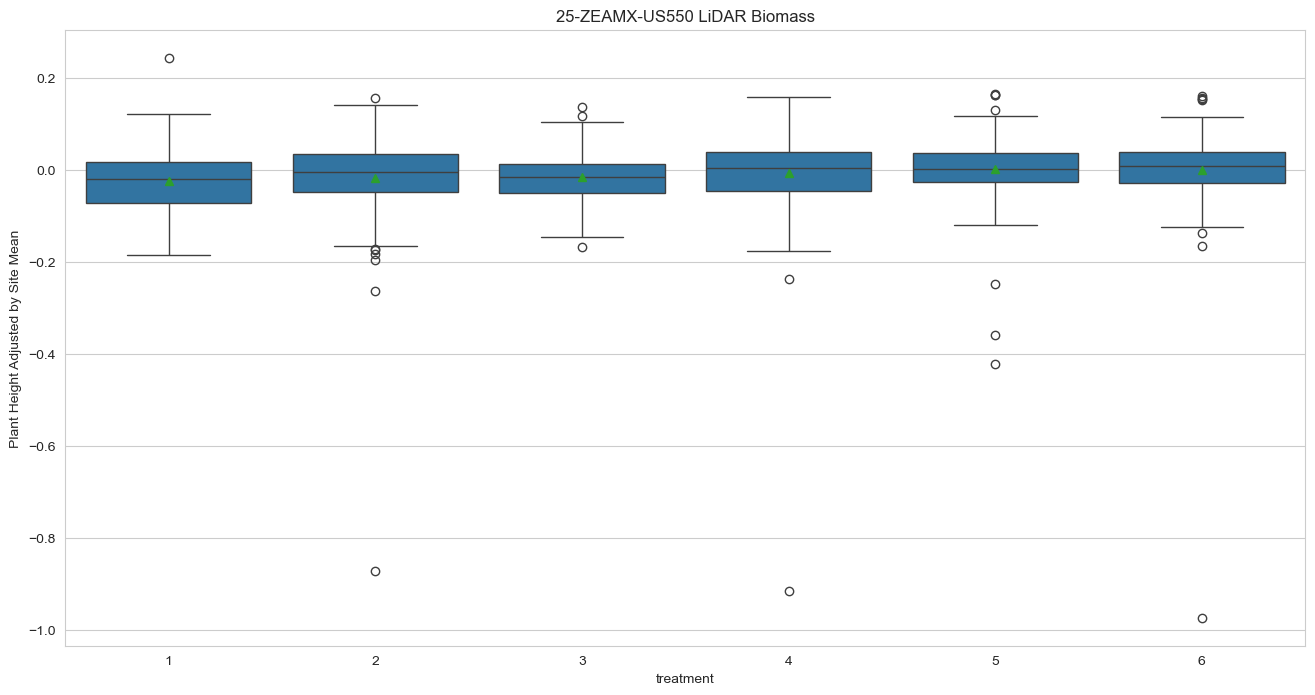

In [78]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_adj, x = 'treatment', y = 'CHM_98_diff', showmeans=True).set(title="25-ZEAMX-US550 LiDAR Biomass", ylabel='Plant Height Adjusted by Site Mean')

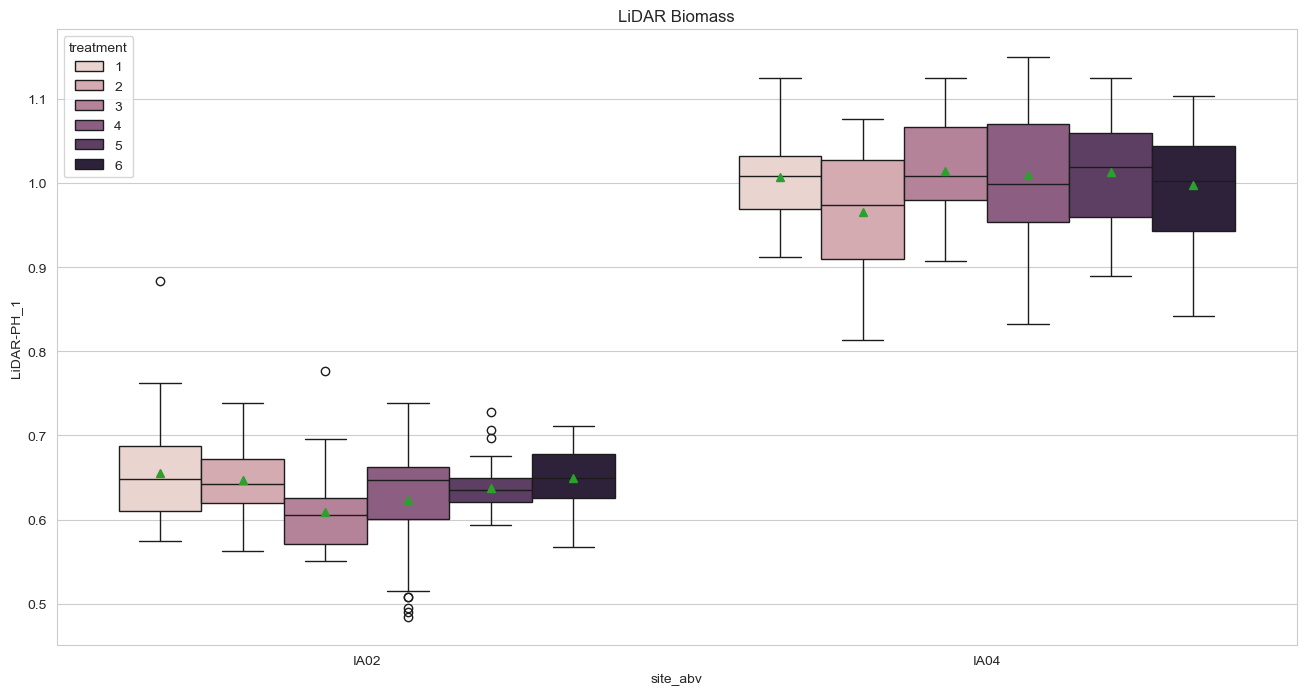

In [79]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data, x = 'site_abv', y = 'CHM_98', hue='treatment', showmeans=True).set(title="LiDAR Biomass", ylabel='LiDAR-PH_1')

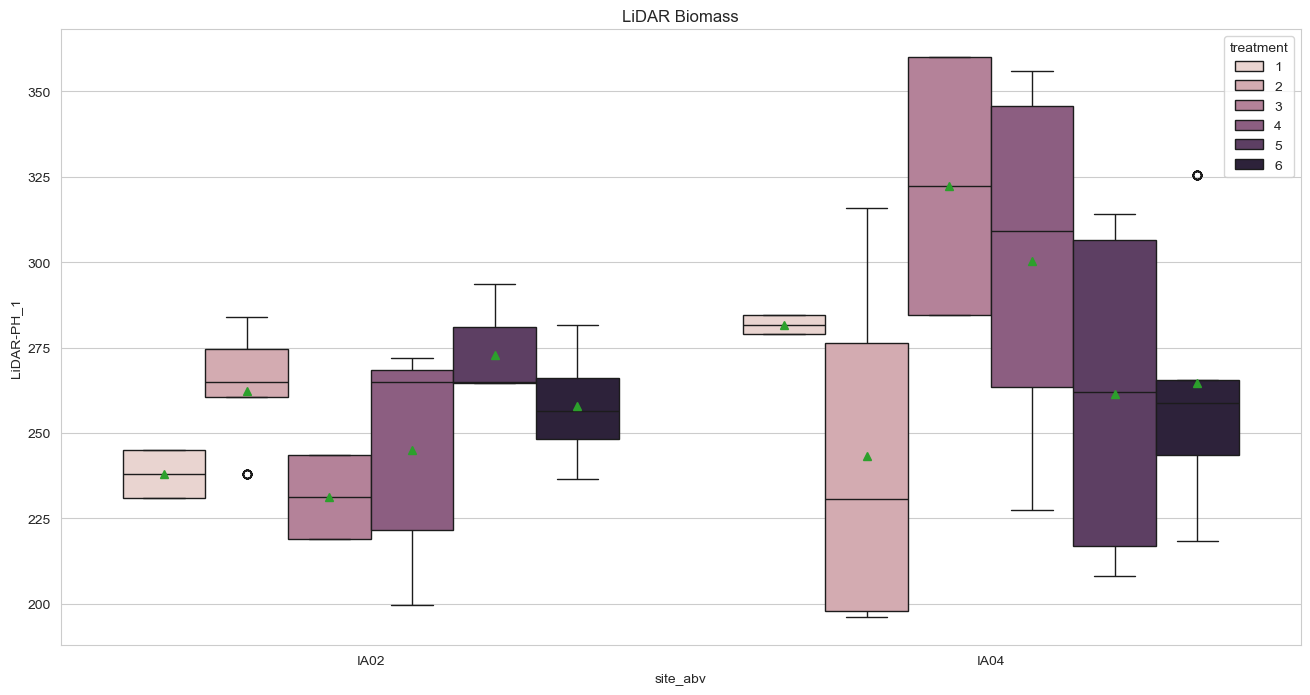

In [80]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data, x = 'site_abv', y = 'Average Plant Biomass', hue='treatment', showmeans=True).set(title="LiDAR Biomass", ylabel='LiDAR-PH_1')

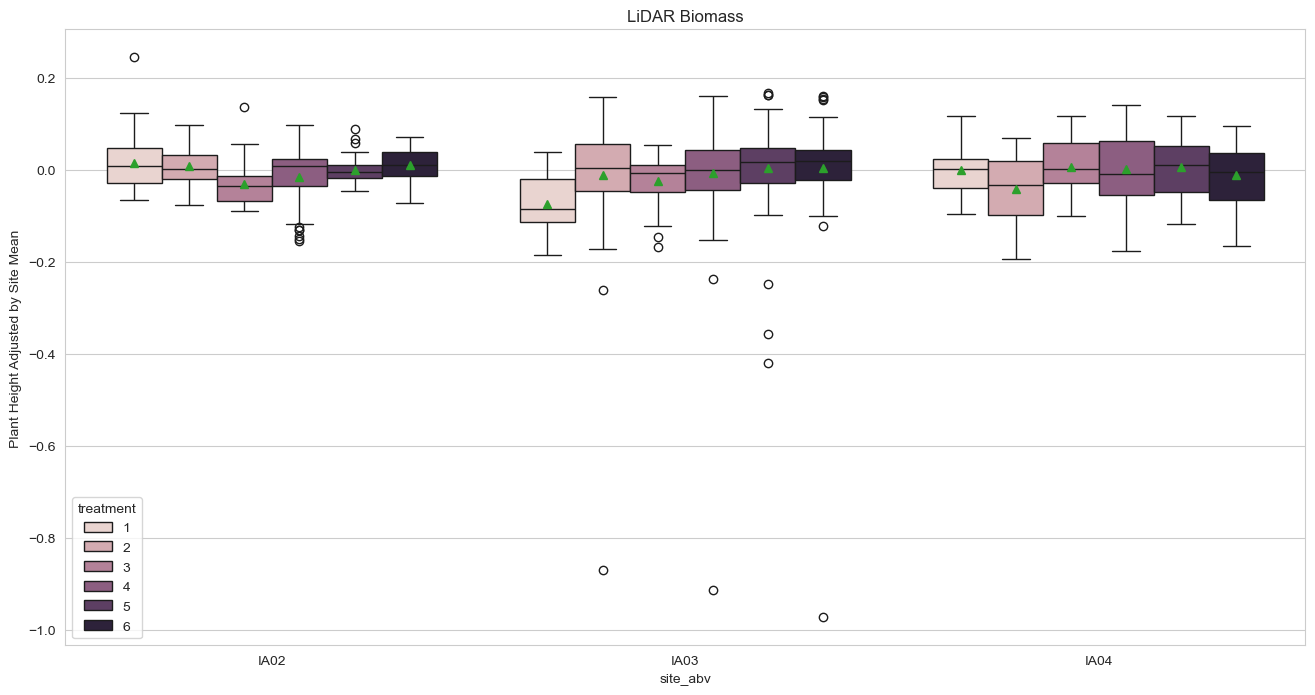

In [81]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_adj, x = 'site_abv', y = 'CHM_98_diff', hue='treatment', showmeans=True).set(title="LiDAR Biomass", ylabel='Plant Height Adjusted by Site Mean')

In [82]:
from sklearn.metrics import mean_squared_error
import numpy as np

data = df_1.copy()
#metrics = data[data.columns[10:]]
metrics = data.copy()
data = data.fillna(0)
#metrics = metrics.fillna(0)
#metrics

variables = metrics.columns
harvest = data
#makes a dictionary
empdict = {}

#the column in the empdict provides the 
# create a table name 'variables'
for column in variables:
    empdict[column] = sps.linregress(harvest[column], harvest['Average Plant Biomass'])    
df = pd.DataFrame.from_dict(empdict, orient = 'index')
df['r_squared'] = df['rvalue'] * df['rvalue']
df = df.sort_values('r_squared', ascending=False)
df

df.dropna(axis=0, how='any',  subset=None, inplace=True)  #thresh=None,
df

################################################################################
rms_lidar = []
df.index

for col in df.index:
    rms = mean_squared_error(harvest['Average Plant Biomass'], (harvest[col] * df.loc[col,'slope'] 
                                                   + df.loc[col,'intercept']))
    rms_lidar.append(rms)
rms_lidar

df1 = pd.DataFrame(rms_lidar, columns=['RMSE'])
df1['metric'] = df.index
df['metric'] = df.index
df = df.set_index('metric')
df = df.reset_index()

df = df.merge(df1,on='metric')
df['RMSE'] = df['RMSE']
#df.head(50)
LNresults = df.copy()
LNresults.head(50)

,metric,slope,intercept,rvalue,pvalue,stderr,r_squared,RMSE
0,Average Plant Biomass,1.000000,0.000000,1.000000,0.000000e+00,0.000000,1.000000,0.000000
1,CHM_98_diff,356.896697,267.370229,0.513933,5.619786e-48,22.661993,0.264127,1259.142057
2,Top_50cm_pc,0.001420,213.083410,0.484211,5.080692e-42,0.000098,0.234460,1309.905811
3,LiDAR_Biomass,216.738242,422.868801,0.420165,5.134828e-31,17.807322,0.176538,1409.014433
4,CHM_mean,109.691068,207.013583,0.413867,4.687948e-30,9.178535,0.171286,1418.001428
5,CHM_98,86.168675,193.459144,0.394640,3.019439e-27,7.632158,0.155741,1444.601205
6,lowerMid_inv_pc,0.002070,292.082408,0.234817,3.897294e-10,0.000326,0.055139,1616.739135


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

data = df_1.copy()
#metrics = data[data.columns[10:]]
metrics = data.copy()
data = data.fillna(0)
#metrics = metrics.fillna(0)
#metrics

variables = metrics.columns
harvest = data
#makes a dictionary
empdict = {}

#the column in the empdict provides the 
# create a table name 'variables'
for column in variables:
    empdict[column] = sps.linregress(harvest[column], harvest['Average Plant Biomass'])    
df = pd.DataFrame.from_dict(empdict, orient = 'index')
df['r_squared'] = df['rvalue'] * df['rvalue']
df = df.sort_values('r_squared', ascending=False)
df

df.dropna(axis=0, how='any',  subset=None, inplace=True)  #thresh=None,
df

################################################################################
rms_lidar = []
df.index

for col in df.index:
    rms = mean_squared_error(harvest['Average Plant Biomass'], (harvest[col] * df.loc[col,'slope'] 
                                                   + df.loc[col,'intercept']))
    rms_lidar.append(rms)
rms_lidar

df1 = pd.DataFrame(rms_lidar, columns=['RMSE'])
df1['metric'] = df.index
df['metric'] = df.index
df = df.set_index('metric')
df = df.reset_index()

df = df.merge(df1,on='metric')
df['RMSE'] = df['RMSE']
#df.head(50)
LNresults = df.copy()
LNresults.head(50)